[View in Colaboratory](https://colab.research.google.com/github/ParisNeo/CNNImageClassifier/blob/master/cnn_MNIST.ipynb)

Test keras stuff and try to train it on google's GPUs.
Thanks google

# CNN MNIST training tutorial using Keras


## Import needed stuff

In [0]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Let's try do make a simple mnist classifier

## Parameters

In [0]:
# data size
input_width = 28
input_height = 28
nb_channels = 1
# learning parameters
nb_epocs = 100
batch_size = 100

## Create model


In [7]:
# Create the model
model = Sequential()
model.add(Conv2D(4,(5,5), input_shape=(input_width, input_height, nb_channels),activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros',name="CV1"))
model.add(MaxPooling2D((3,3),name="Pooling1"))
model.add(Conv2D(3,(4,2),activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros',name="CV2"))
model.add(MaxPooling2D((3,3),name="pooling2"))
model.add(Flatten(name="Flatten"))
model.add(Dense(10, activation="softmax", kernel_initializer='random_uniform', bias_initializer='zeros', name="Dense"))
# Compile it
model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
#Print summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CV1 (Conv2D)                 (None, 24, 24, 4)         104       
_________________________________________________________________
Pooling1 (MaxPooling2D)      (None, 8, 8, 4)           0         
_________________________________________________________________
CV2 (Conv2D)                 (None, 5, 7, 3)           99        
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 1, 2, 3)           0         
_________________________________________________________________
Flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
Dense (Dense)                (None, 10)                70        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


## Load dataset

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
x_train = np.expand_dims(x_train,axis=3)
x_test = np.expand_dims(x_test,axis=3)

print(x_train.shape)
print(y_train.shape)


11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28, 1)
(60000, 10)


## Train it

In [8]:
# Now prepare for fitting
# Save the model according to the conditions
checkpoint = ModelCheckpoint("my_net.h5", monitor='val_acc', verbose=1,save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=100, validation_data=(x_test, y_test),callbacks=[checkpoint, early])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/step - loss: 1.6810 - acc: 0.4044 - val_loss: 1.0285 - val_acc: 0.6394

Epoch 00001: val_acc improved from -inf to 0.63940, saving model to my_net.h5
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.9815 - acc: 0.6639 - val_loss: 0.8929 - val_acc: 0.6918

Epoch 00002: val_acc improved from 0.63940 to 0.69180, saving model to my_net.h5
Epoch 3/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.8766 - acc: 0.7063 - val_loss: 0.7700 - val_acc: 0.7435

Epoch 00003: val_acc improved from 0.69180 to 0.74350, saving model to my_net.h5
Epoch 4/100
27900/60000 [============>.................] - ETA: 1s - loss: 0.8085 - acc: 0.7339

60000/60000 [==============================] - 4s 62us/step - loss: 0.7976 - acc: 0.7389 - val_loss: 0.7401 - val_acc: 0.7514

Epoch 00004: val_acc improved from 0.74350 to 0.75140, saving model to my_net.h5
Epoch 5/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.7446 - acc: 0.7606 - val_loss: 0.6675 - val_acc: 0.7789

Epoch 00005: val_acc improved from 0.75140 to 0.77890, saving model to my_net.h5
Epoch 6/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.7108 - acc: 0.7729 - val_loss: 0.6373 - val_acc: 0.7892

Epoch 00006: val_acc improved from 0.77890 to 0.78920, saving model to my_net.h5
Epoch 7/100
47400/60000 [======================>.......] - ETA: 0s - loss: 0.6912 - acc: 0.7805

60000/60000 [==============================] - 4s 62us/step - loss: 0.6833 - acc: 0.7832 - val_loss: 0.6058 - val_acc: 0.8018

Epoch 00007: val_acc improved from 0.78920 to 0.80180, saving model to my_net.h5
Epoch 8/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.6424 - acc: 0.7961 - val_loss: 0.5974 - val_acc: 0.8071

Epoch 00008: val_acc improved from 0.80180 to 0.80710, saving model to my_net.h5
Epoch 9/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.6068 - acc: 0.8075 - val_loss: 0.5555 - val_acc: 0.8189

Epoch 00009: val_acc improved from 0.80710 to 0.81890, saving model to my_net.h5
Epoch 10/100
49300/60000 [=======================>......] - ETA: 0s - loss: 0.5851 - acc: 0.8155

60000/60000 [==============================] - 4s 63us/step - loss: 0.5819 - acc: 0.8162 - val_loss: 0.5162 - val_acc: 0.8318

Epoch 00010: val_acc improved from 0.81890 to 0.83180, saving model to my_net.h5
Epoch 11/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.5676 - acc: 0.8205 - val_loss: 0.5126 - val_acc: 0.8332

Epoch 00011: val_acc improved from 0.83180 to 0.83320, saving model to my_net.h5
Epoch 12/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5547 - acc: 0.8250 - val_loss: 0.5149 - val_acc: 0.8342

Epoch 00012: val_acc improved from 0.83320 to 0.83420, saving model to my_net.h5
Epoch 13/100
48300/60000 [=======================>......] - ETA: 0s - loss: 0.5461 - acc: 0.8274

60000/60000 [==============================] - 4s 62us/step - loss: 0.5431 - acc: 0.8290 - val_loss: 0.5080 - val_acc: 0.8345

Epoch 00013: val_acc improved from 0.83420 to 0.83450, saving model to my_net.h5
Epoch 14/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5330 - acc: 0.8324 - val_loss: 0.4854 - val_acc: 0.8452

Epoch 00014: val_acc improved from 0.83450 to 0.84520, saving model to my_net.h5
Epoch 15/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5282 - acc: 0.8337 - val_loss: 0.4942 - val_acc: 0.8417

Epoch 00015: val_acc did not improve from 0.84520
Epoch 16/100
50300/60000 [========================>.....] - ETA: 0s - loss: 0.5240 - acc: 0.8362

60000/60000 [==============================] - 4s 62us/step - loss: 0.5236 - acc: 0.8353 - val_loss: 0.4720 - val_acc: 0.8469

Epoch 00016: val_acc improved from 0.84520 to 0.84690, saving model to my_net.h5
Epoch 17/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5158 - acc: 0.8375 - val_loss: 0.4841 - val_acc: 0.8446

Epoch 00017: val_acc did not improve from 0.84690
Epoch 18/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5102 - acc: 0.8404 - val_loss: 0.4707 - val_acc: 0.8533

Epoch 00018: val_acc improved from 0.84690 to 0.85330, saving model to my_net.h5
Epoch 19/100
53900/60000 [=========================>....] - ETA: 0s - loss: 0.5059 - acc: 0.8397

60000/60000 [==============================] - 4s 62us/step - loss: 0.5077 - acc: 0.8393 - val_loss: 0.4663 - val_acc: 0.8523

Epoch 00019: val_acc did not improve from 0.85330
Epoch 20/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5058 - acc: 0.8407 - val_loss: 0.4851 - val_acc: 0.8453

Epoch 00020: val_acc did not improve from 0.85330
Epoch 21/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4992 - acc: 0.8424 - val_loss: 0.4809 - val_acc: 0.8448

Epoch 00021: val_acc did not improve from 0.85330
Epoch 22/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4965 - acc: 0.8437 - val_loss: 0.4632 - val_acc: 0.8552

Epoch 00022: val_acc improved from 0.85330 to 0.85520, saving model to my_net.h5
Epoch 23/100
 3700/60000 [>.............................] - ETA: 3s - loss: 0.5002 - acc: 0.8454

60000/60000 [==============================] - 4s 62us/step - loss: 0.4939 - acc: 0.8449 - val_loss: 0.4625 - val_acc: 0.8530

Epoch 00023: val_acc did not improve from 0.85520
Epoch 24/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4922 - acc: 0.8452 - val_loss: 0.4745 - val_acc: 0.8527

Epoch 00024: val_acc did not improve from 0.85520
Epoch 25/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4919 - acc: 0.8456 - val_loss: 0.4659 - val_acc: 0.8547

Epoch 00025: val_acc did not improve from 0.85520
Epoch 26/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4906 - acc: 0.8461 - val_loss: 0.4787 - val_acc: 0.8474



Epoch 00026: val_acc did not improve from 0.85520
Epoch 27/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4891 - acc: 0.8467 - val_loss: 0.4553 - val_acc: 0.8595

Epoch 00027: val_acc improved from 0.85520 to 0.85950, saving model to my_net.h5
Epoch 28/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4877 - acc: 0.8469 - val_loss: 0.4756 - val_acc: 0.8479

Epoch 00028: val_acc did not improve from 0.85950
Epoch 29/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4902 - acc: 0.8465 - val_loss: 0.4718 - val_acc: 0.8530

Epoch 00029: val_acc did not improve from 0.85950
Epoch 30/100
30400/60000 [==============>...............] - ETA: 1s - loss: 0.4838 - acc: 0.8454

60000/60000 [==============================] - 4s 63us/step - loss: 0.4854 - acc: 0.8471 - val_loss: 0.4726 - val_acc: 0.8510

Epoch 00030: val_acc did not improve from 0.85950
Epoch 31/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4861 - acc: 0.8462 - val_loss: 0.4686 - val_acc: 0.8552

Epoch 00031: val_acc did not improve from 0.85950
Epoch 32/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4865 - acc: 0.8473 - val_loss: 0.4545 - val_acc: 0.8595

Epoch 00032: val_acc improved from 0.85950 to 0.85950, saving model to my_net.h5
Epoch 33/100
58800/60000 [============================>.] - ETA: 0s - loss: 0.4840 - acc: 0.8487

60000/60000 [==============================] - 4s 64us/step - loss: 0.4858 - acc: 0.8481 - val_loss: 0.4601 - val_acc: 0.8548

Epoch 00033: val_acc did not improve from 0.85950
Epoch 34/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4859 - acc: 0.8473 - val_loss: 0.4560 - val_acc: 0.8583

Epoch 00034: val_acc did not improve from 0.85950
Epoch 35/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4875 - acc: 0.8469 - val_loss: 0.4603 - val_acc: 0.8552

Epoch 00035: val_acc did not improve from 0.85950
Epoch 36/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4848 - acc: 0.8477 - val_loss: 0.4618 - val_acc: 0.8565

Epoch 00036: val_acc did not improve from 0.85950
Epoch 37/100
 2800/60000 [>.............................] - ETA: 3s - loss: 0.4852 - acc: 0.8432

60000/60000 [==============================] - 4s 63us/step - loss: 0.4823 - acc: 0.8485 - val_loss: 0.4617 - val_acc: 0.8555

Epoch 00037: val_acc did not improve from 0.85950
Epoch 38/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4848 - acc: 0.8470 - val_loss: 0.4781 - val_acc: 0.8478

Epoch 00038: val_acc did not improve from 0.85950
Epoch 39/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4850 - acc: 0.8477 - val_loss: 0.4630 - val_acc: 0.8565

Epoch 00039: val_acc did not improve from 0.85950
Epoch 40/100
57900/60000 [===========================>..] - ETA: 0s - loss: 0.4836 - acc: 0.8479

60000/60000 [==============================] - 4s 64us/step - loss: 0.4852 - acc: 0.8471 - val_loss: 0.4512 - val_acc: 0.8602

Epoch 00040: val_acc improved from 0.85950 to 0.86020, saving model to my_net.h5
Epoch 41/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4836 - acc: 0.8474 - val_loss: 0.4537 - val_acc: 0.8571

Epoch 00041: val_acc did not improve from 0.86020
Epoch 42/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4856 - acc: 0.8474 - val_loss: 0.4606 - val_acc: 0.8578

Epoch 00042: val_acc did not improve from 0.86020
Epoch 43/100
56000/60000 [===========================>..] - ETA: 0s - loss: 0.4814 - acc: 0.8489

60000/60000 [==============================] - 4s 63us/step - loss: 0.4819 - acc: 0.8490 - val_loss: 0.4624 - val_acc: 0.8576

Epoch 00043: val_acc did not improve from 0.86020
Epoch 44/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4838 - acc: 0.8480 - val_loss: 0.4704 - val_acc: 0.8549

Epoch 00044: val_acc did not improve from 0.86020
Epoch 45/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4834 - acc: 0.8481 - val_loss: 0.4556 - val_acc: 0.8597

Epoch 00045: val_acc did not improve from 0.86020
Epoch 46/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4830 - acc: 0.8473 - val_loss: 0.4642 - val_acc: 0.8583

Epoch 00046: val_acc did not improve from 0.86020
Epoch 47/100
 2700/60000 [>.............................] - ETA: 3s - loss: 0.4942 - acc: 0.8459

60000/60000 [==============================] - 4s 64us/step - loss: 0.4827 - acc: 0.8492 - val_loss: 0.4665 - val_acc: 0.8513

Epoch 00047: val_acc did not improve from 0.86020
Epoch 48/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4826 - acc: 0.8477 - val_loss: 0.4564 - val_acc: 0.8605

Epoch 00048: val_acc improved from 0.86020 to 0.86050, saving model to my_net.h5
Epoch 49/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4843 - acc: 0.8488 - val_loss: 0.4601 - val_acc: 0.8578

Epoch 00049: val_acc did not improve from 0.86050
Epoch 50/100
52600/60000 [=========================>....] - ETA: 0s - loss: 0.4814 - acc: 0.8489

60000/60000 [==============================] - 4s 63us/step - loss: 0.4820 - acc: 0.8486 - val_loss: 0.4489 - val_acc: 0.8619

Epoch 00050: val_acc improved from 0.86050 to 0.86190, saving model to my_net.h5
Epoch 51/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4840 - acc: 0.8468 - val_loss: 0.4640 - val_acc: 0.8542

Epoch 00051: val_acc did not improve from 0.86190
Epoch 52/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4811 - acc: 0.8492 - val_loss: 0.4837 - val_acc: 0.8486

Epoch 00052: val_acc did not improve from 0.86190
Epoch 53/100
56500/60000 [===========================>..] - ETA: 0s - loss: 0.4800 - acc: 0.8498

60000/60000 [==============================] - 4s 63us/step - loss: 0.4797 - acc: 0.8500 - val_loss: 0.4668 - val_acc: 0.8532

Epoch 00053: val_acc did not improve from 0.86190
Epoch 54/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4816 - acc: 0.8492 - val_loss: 0.4531 - val_acc: 0.8583

Epoch 00054: val_acc did not improve from 0.86190
Epoch 55/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4812 - acc: 0.8476 - val_loss: 0.4552 - val_acc: 0.8594

Epoch 00055: val_acc did not improve from 0.86190
Epoch 56/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4821 - acc: 0.8468 - val_loss: 0.4547 - val_acc: 0.8603

Epoch 00056: val_acc did not improve from 0.86190
Epoch 57/100
 2800/60000 [>.............................] - ETA: 3s - loss: 0.4448 - acc: 0.8614

60000/60000 [==============================] - 4s 63us/step - loss: 0.4824 - acc: 0.8488 - val_loss: 0.4559 - val_acc: 0.8587

Epoch 00057: val_acc did not improve from 0.86190
Epoch 58/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4819 - acc: 0.8491 - val_loss: 0.4597 - val_acc: 0.8582

Epoch 00058: val_acc did not improve from 0.86190
Epoch 59/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.4826 - acc: 0.8483 - val_loss: 0.4574 - val_acc: 0.8573

Epoch 00059: val_acc did not improve from 0.86190
Epoch 60/100
58900/60000 [============================>.] - ETA: 0s - loss: 0.4799 - acc: 0.8496

60000/60000 [==============================] - 4s 63us/step - loss: 0.4805 - acc: 0.8493 - val_loss: 0.4583 - val_acc: 0.8551

Epoch 00060: val_acc did not improve from 0.86190
Epoch 00060: early stopping


## Test it on some image

0


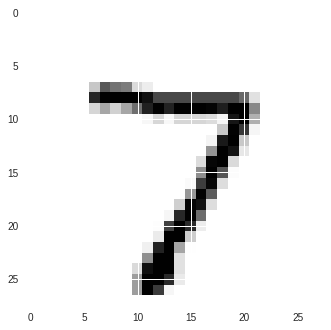

Prediction = 7
1


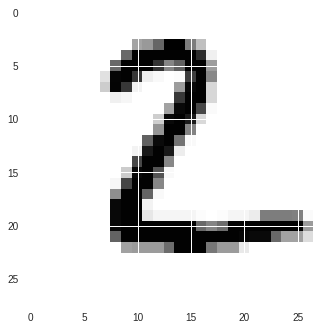

Prediction = 2
2


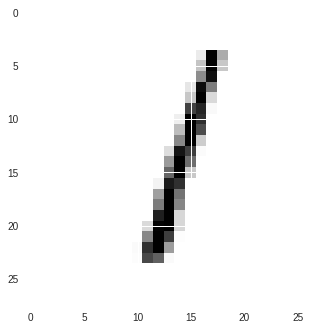

Prediction = 1
3


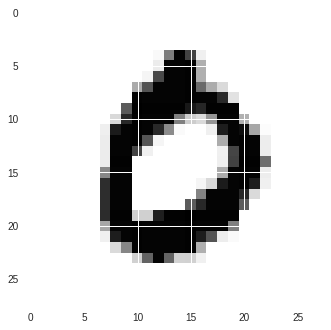

Prediction = 0
4


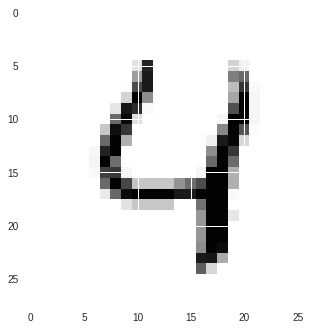

Prediction = 4
5


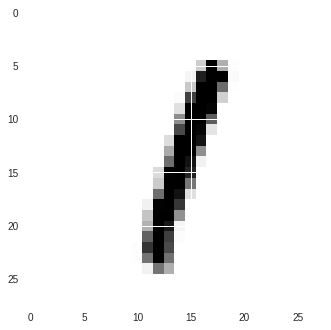

Prediction = 1
6


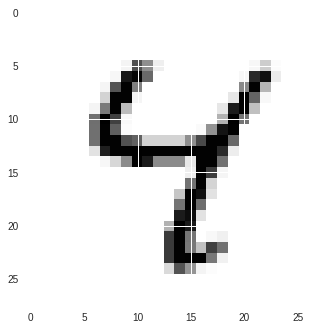

Prediction = 4
7


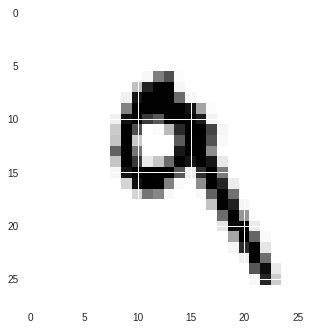

Prediction = 9
8


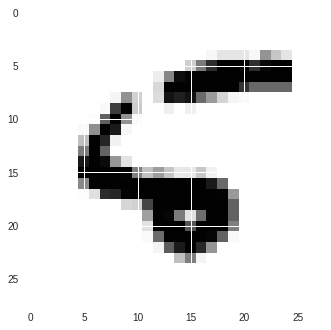

Prediction = 5
9


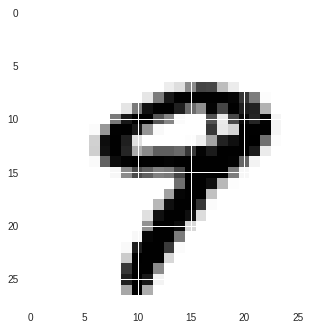

Prediction = 9
10


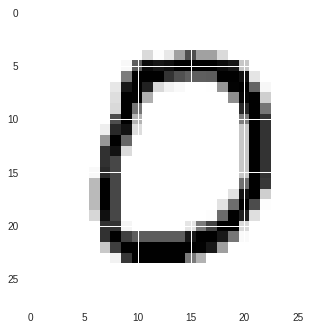

Prediction = 0
11


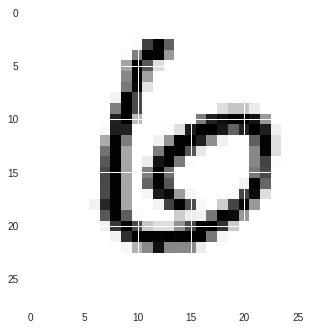

Prediction = 6
12


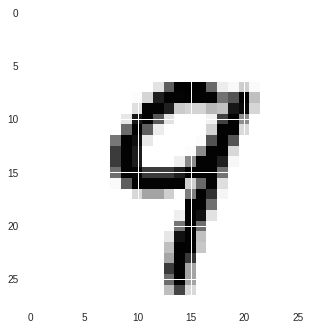

Prediction = 9
13


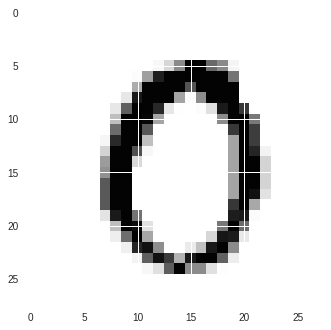

Prediction = 0
14


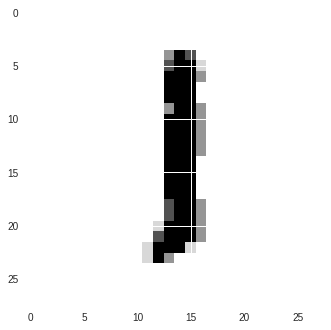

Prediction = 1
15


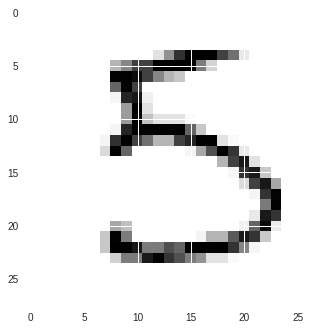

Prediction = 9
16


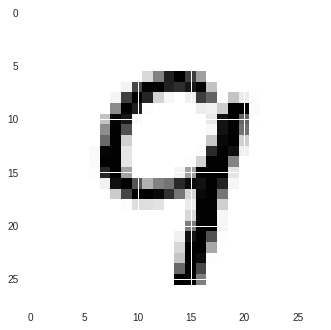

Prediction = 9
17


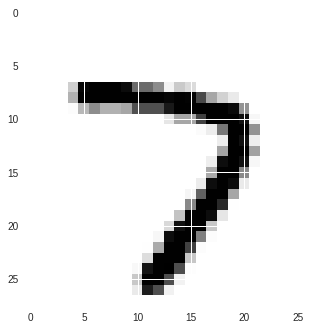

Prediction = 7
18


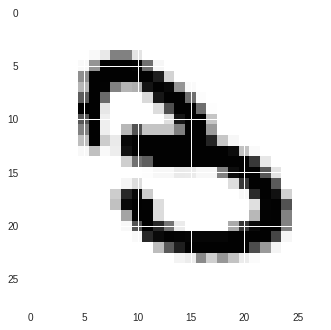

Prediction = 3
19


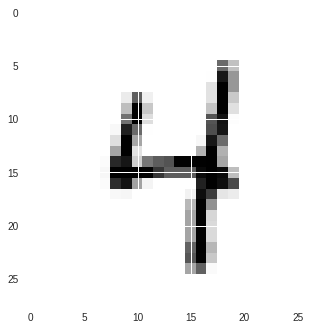

Prediction = 4
20


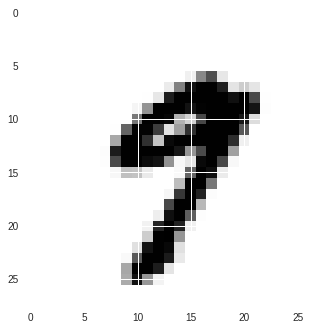

Prediction = 9
21


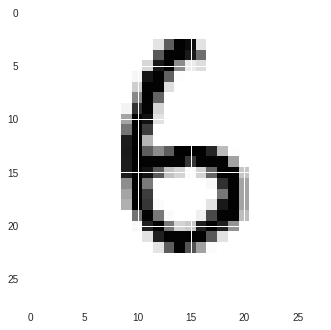

Prediction = 6
22


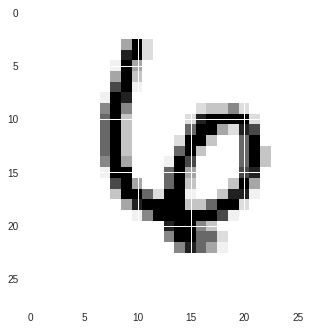

Prediction = 6
23


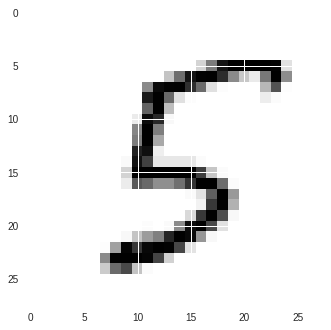

Prediction = 5
24


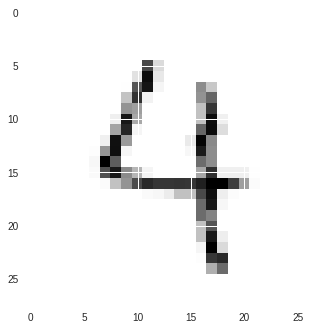

Prediction = 4
25


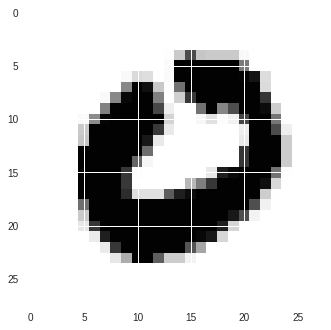

Prediction = 6
26


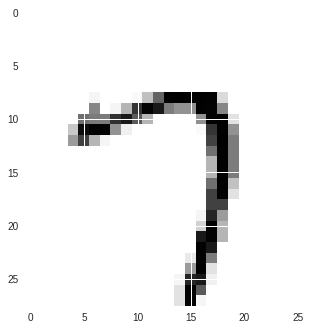

Prediction = 7
27


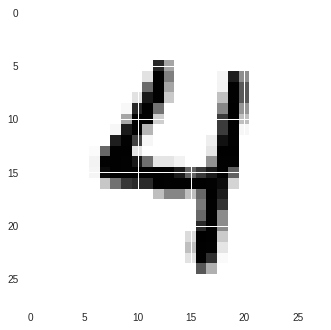

Prediction = 4
28


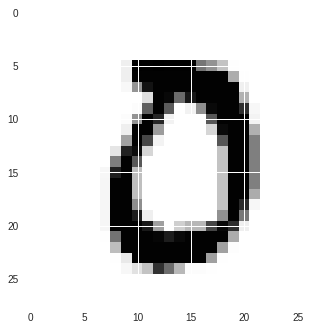

Prediction = 0
29


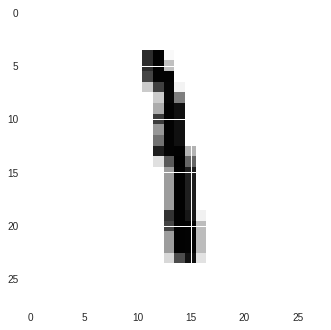

Prediction = 1
30


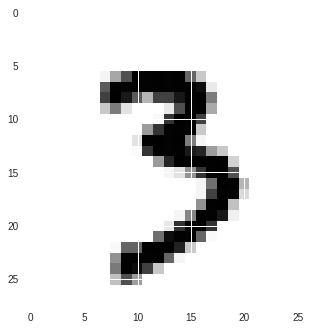

Prediction = 3
31


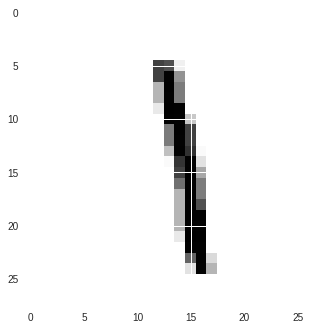

Prediction = 1
32


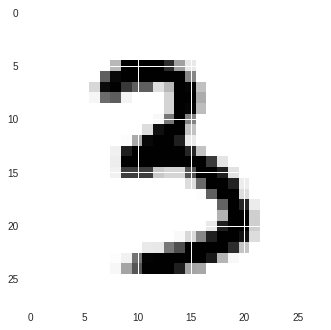

Prediction = 3
33


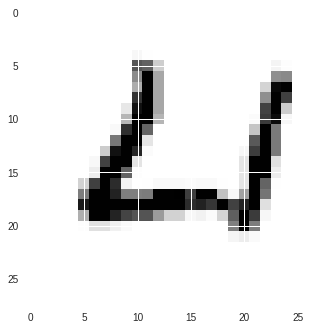

Prediction = 4
34


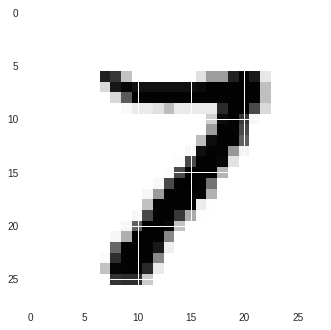

Prediction = 7
35


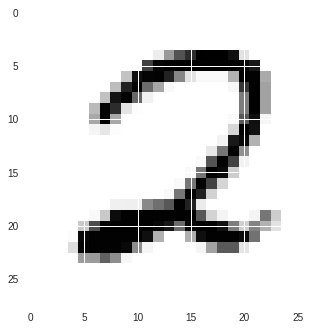

Prediction = 2
36


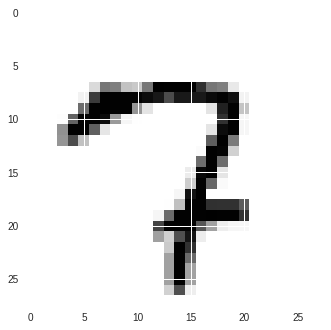

Prediction = 7
37


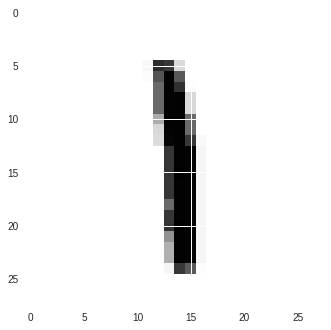

Prediction = 1
38


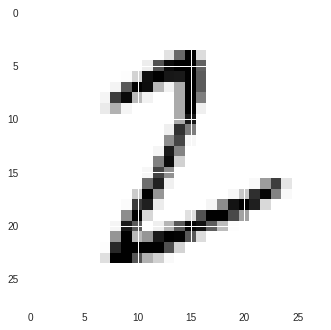

Prediction = 2
39


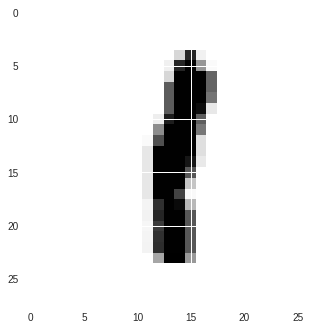

Prediction = 1
40


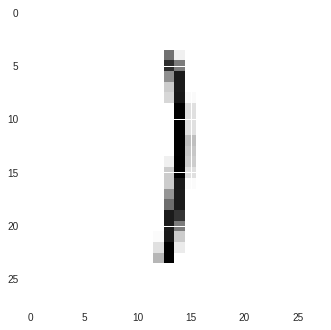

Prediction = 1
41


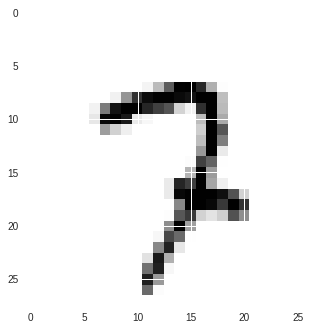

Prediction = 7
42


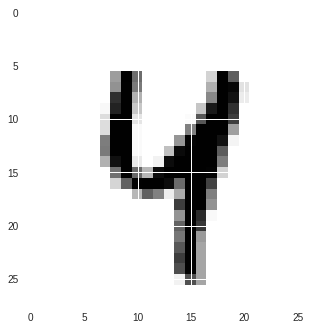

Prediction = 4
43


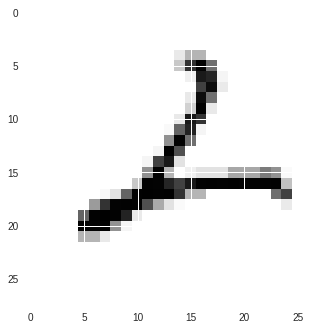

Prediction = 8
44


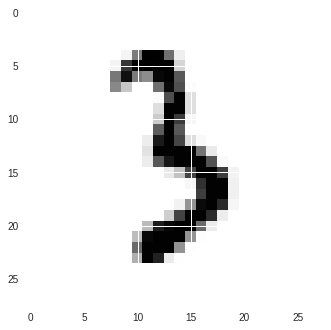

Prediction = 3
45


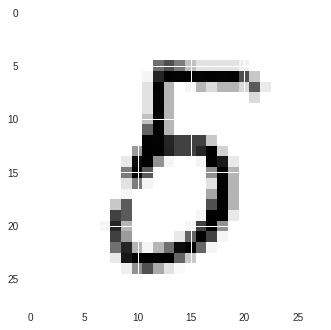

Prediction = 5
46


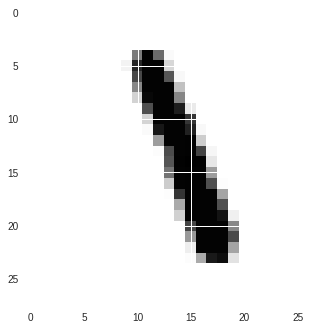

Prediction = 1
47


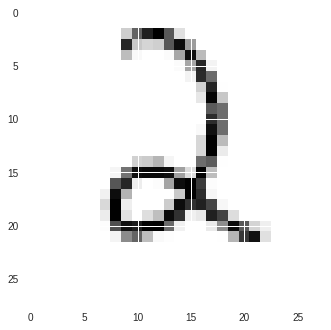

Prediction = 2
48


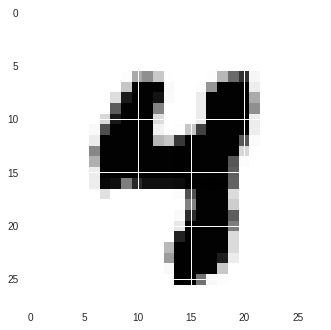

Prediction = 4
49


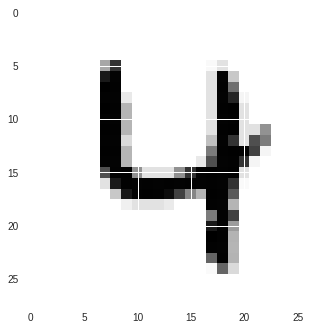

Prediction = 4
50


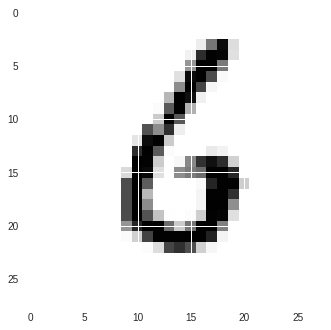

Prediction = 6
51


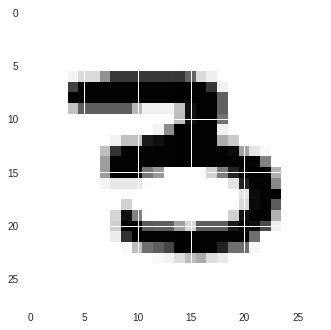

Prediction = 2
52


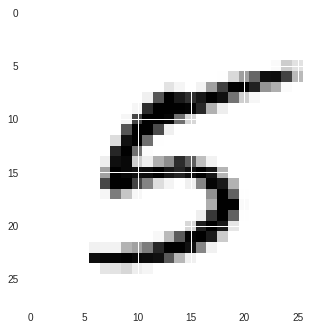

Prediction = 5
53


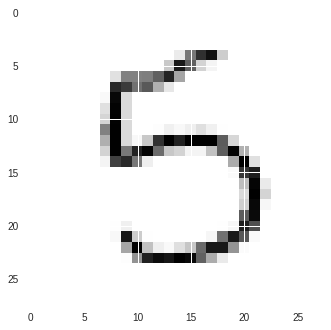

Prediction = 9
54


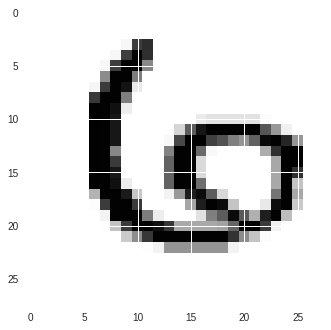

Prediction = 6
55


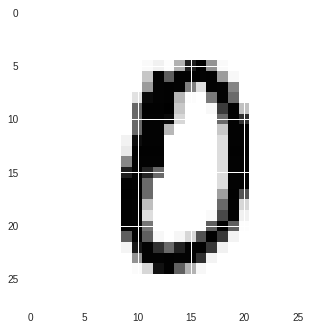

Prediction = 6
56


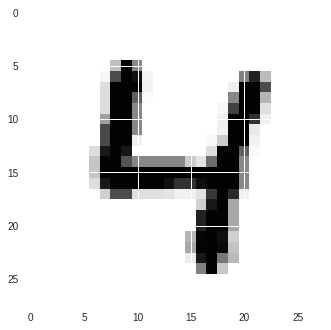

Prediction = 4
57


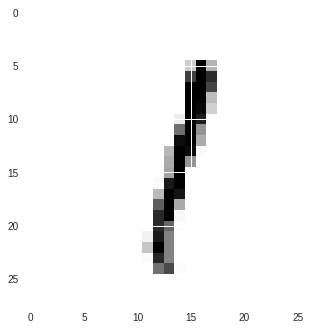

Prediction = 1
58


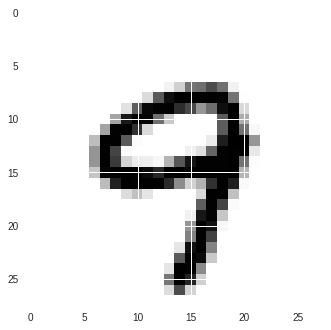

Prediction = 9
59


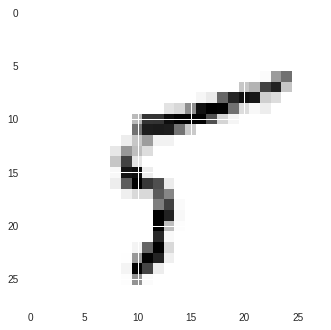

Prediction = 5
60


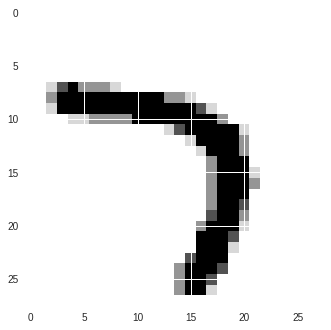

Prediction = 7
61


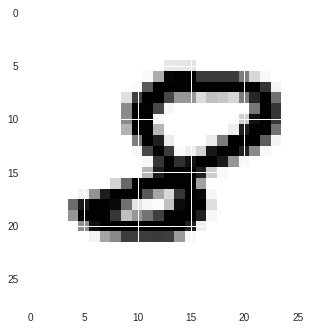

Prediction = 8
62


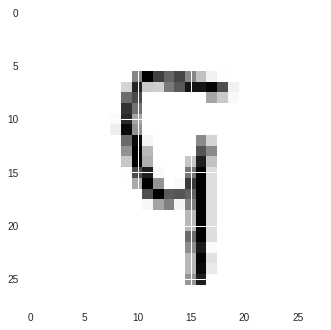

Prediction = 9
63


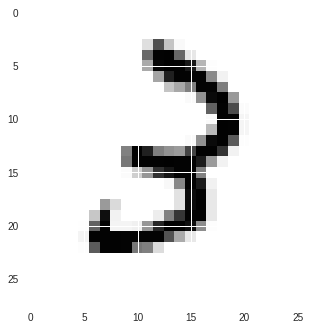

Prediction = 3
64


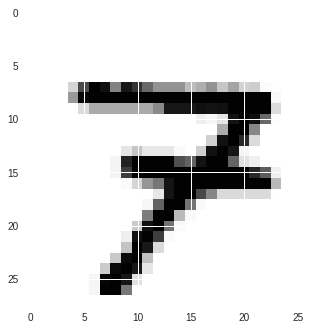

Prediction = 3
65


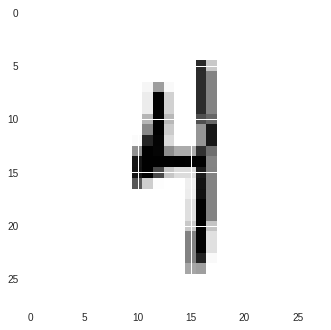

Prediction = 4
66


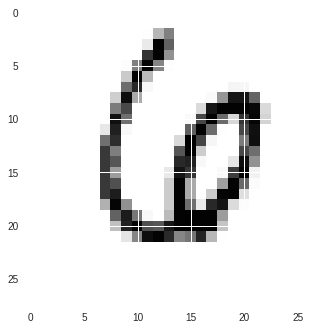

Prediction = 6
67


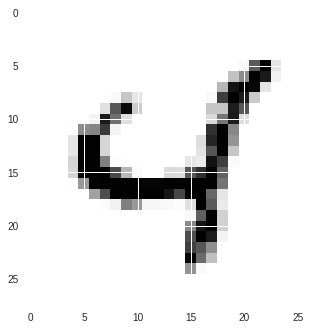

Prediction = 4
68


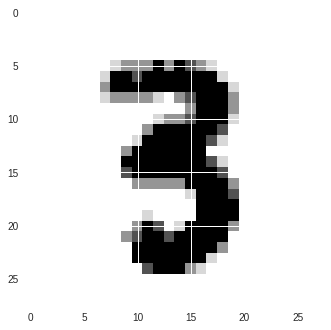

Prediction = 3
69


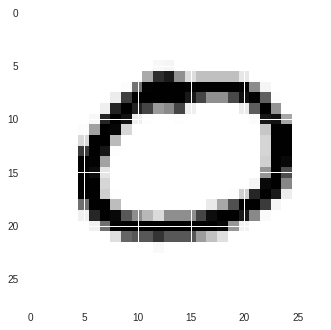

Prediction = 0
70


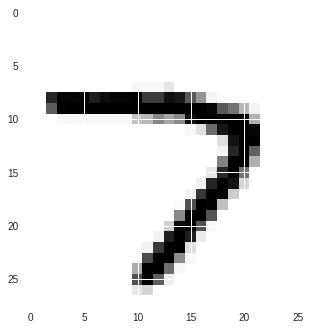

Prediction = 7
71


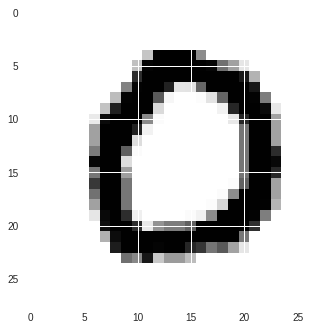

Prediction = 0
72


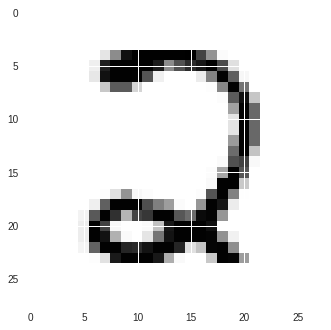

Prediction = 2
73


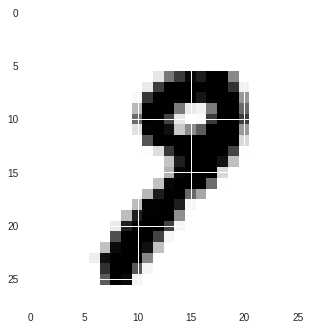

Prediction = 8
74


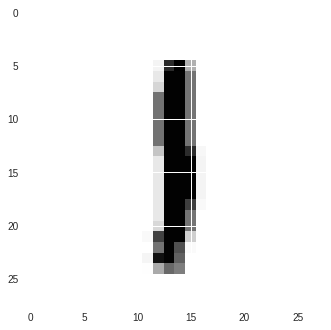

Prediction = 1
75


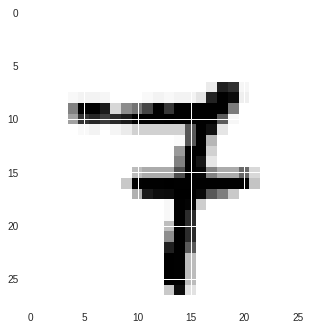

Prediction = 7
76


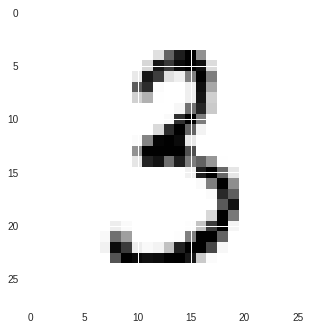

Prediction = 3
77


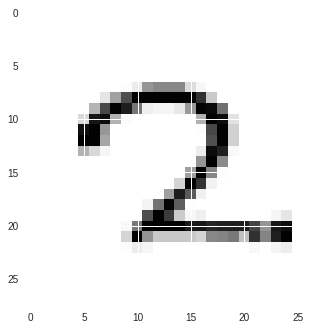

Prediction = 2
78


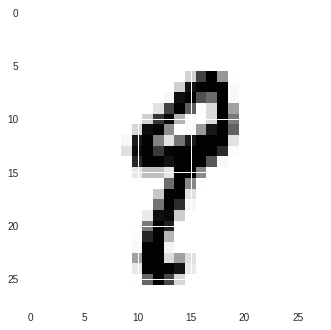

Prediction = 9
79


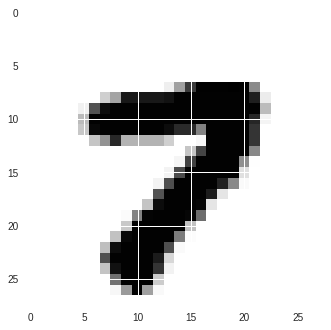

Prediction = 7
80


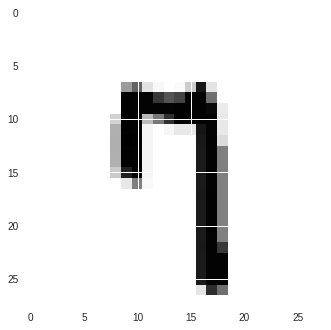

Prediction = 5
81


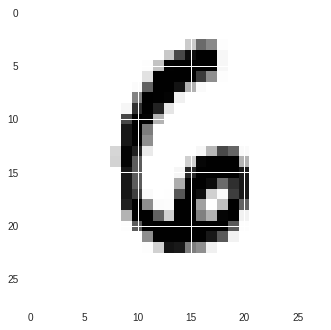

Prediction = 6
82


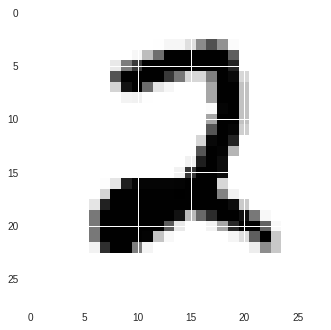

Prediction = 2
83


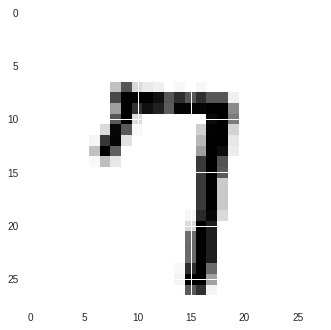

Prediction = 7
84


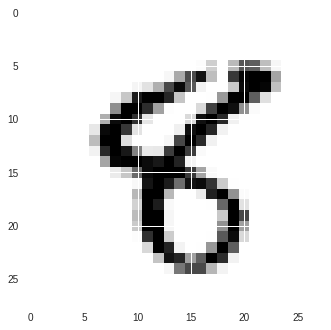

Prediction = 9
85


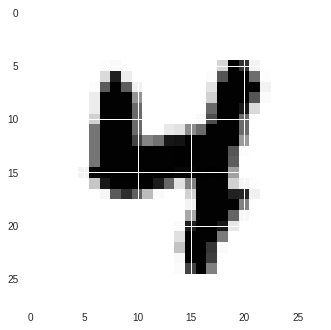

Prediction = 4
86


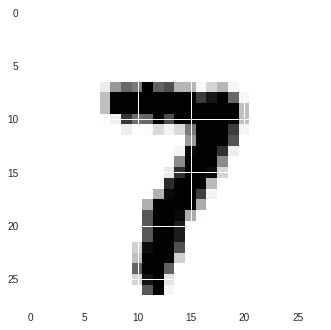

Prediction = 7
87


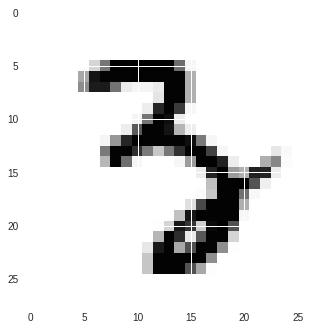

Prediction = 3
88


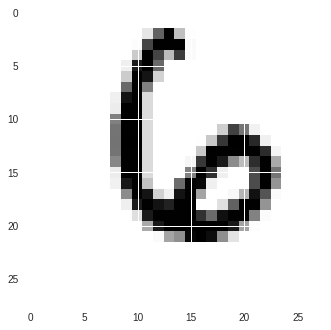

Prediction = 6
89


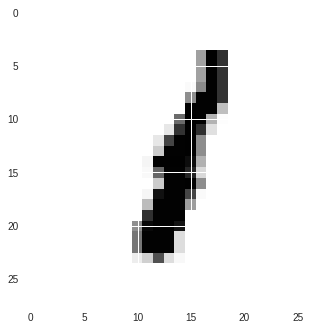

Prediction = 1
90


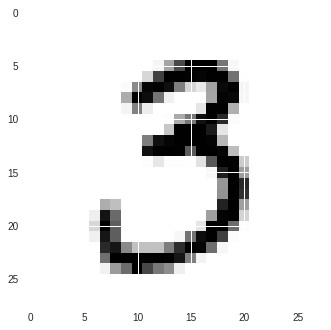

Prediction = 3
91


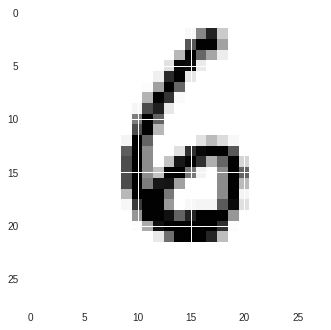

Prediction = 6
92


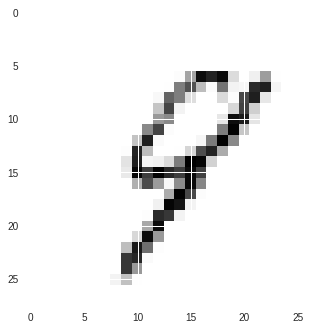

Prediction = 9
93


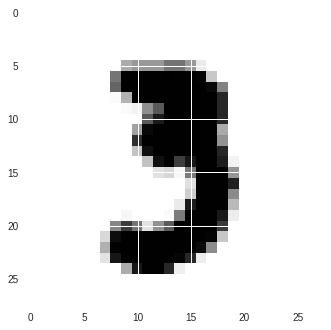

Prediction = 3
94


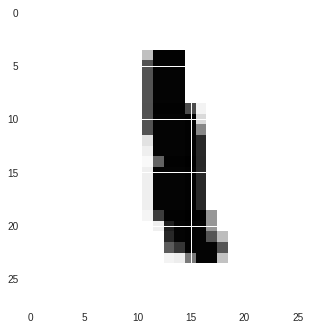

Prediction = 8
95


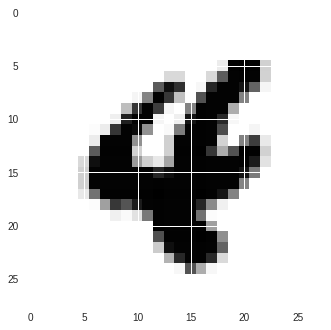

Prediction = 4
96


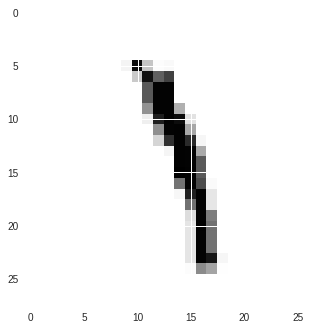

Prediction = 1
97


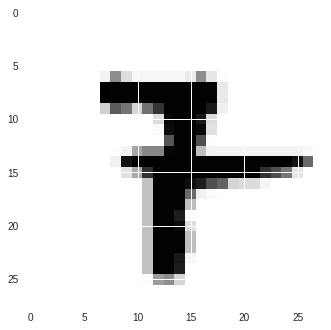

Prediction = 3
98


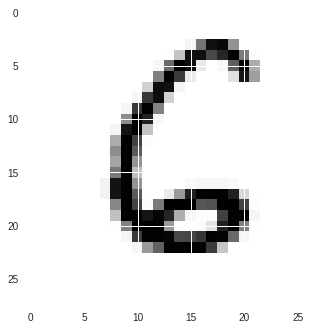

Prediction = 6
99


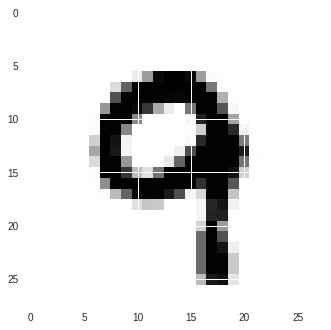

Prediction = 9


In [39]:
for index in range(100):
  print(index)
  plt.imshow(x_test[index,:,:,0])
  plt.show()
  x=np.expand_dims(x_test[index,:,:,:], axis=0)
  prediction = model.predict(x)
  print("Prediction = {}".format(np.argmax(prediction)))